<a href="https://colab.research.google.com/github/tahminehladi/Bulldozer_price_regression/blob/main/Driver_behavior_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
robinreni_revitsone_5class_path = kagglehub.dataset_download('robinreni/revitsone-5class')

print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from numpy import asarray
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import glob
import os
import random
import subprocess
from skimage.io import imread
from matplotlib.patches import Rectangle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
import os

# Path to the 'Revitsone_5classes' folder
base_path = os.path.join(robinreni_revitsone_5class_path, "Revitsone-5classes")

# Supported image file extensions
image_extensions = (".png", ".jpg", ".jpeg")

# Dictionary to store image paths for each folder (category)
image_lists = {}

# List of folder names to process
folder_names = ["other_activities", "safe_driving", "texting_phone", "turning", "talking_phone"]

# Iterate through the specified folders
for folder_name in folder_names:
    folder_path = os.path.join(base_path, folder_name)

    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Initialize a list for this folder
        image_lists[folder_name] = []

        # Iterate through files in the folder
        for file_name in os.listdir(folder_path):
            if file_name.endswith(image_extensions):
                full_path = os.path.join(folder_path, file_name)
                image_lists[folder_name].append(full_path)
                print(full_path)

# Summary: Print the number of images in each folder
for category, images in image_lists.items():
    print(f"Category: {category}, Number of Images: {len(images)}")


Streaming output truncated to the last 5000 lines.
/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/texting_phone/img_42159.jpg
/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/texting_phone/img_45692.jpg
/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/texting_phone/img_17218.jpg
/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/texting_phone/img_12855.jpg
/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/texting_phone/img_24537.jpg
/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/texting_phone/img_14796.jpg
/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/texting_phone/img_30529.jpg
/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/texting_phone/img_14501.jpg
/root/.cache/

In [ ]:
image_list_other =image_lists["other_activities"]
image_list_safe=image_lists['safe_driving']
image_list_talking=image_lists['talking_phone']
image_list_text=image_lists['texting_phone']
image_list_turn=image_lists['turning']


In [ ]:
image_list_other

['/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities/img_20133.jpg',
 '/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities/img_20233.jpg',
 '/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities/img_4232.jpg',
 '/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities/img_14966.jpg',
 '/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities/img_23365.jpg',
 '/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities/img_24290.jpg',
 '/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities/img_4841.jpg',
 '/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities/img_18851.jpg',
 '/root/.c

In [ ]:
len(image_list_other), len(image_list_safe), len(image_list_talking), len(image_list_text), len(image_list_turn)

(2128, 2203, 2169, 2203, 2063)

In [ ]:
image_list_other.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities/img_79.jpg')
image_list_other.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities/img_4664.jpg')
image_list_other.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities/img_7973.jpg')
image_list_other.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities/img_13318.jpg')
image_list_other.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities/img_13396.jpg')
image_list_other.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities/img_13541.jpg')
image_list_other.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities/img_13625.jpg')
image_list_other.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities/img_20398.jpg')
image_list_other.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities/img_22266.jpg')

image_list_turn.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/turning/img_8771.jpg')
image_list_turn.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/turning/img_62337.jpg')
image_list_turn.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/turning/img_67523.jpg')
image_list_turn.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/turning/img_70552.jpg')
image_list_turn.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/turning/img_84605.jpg')
image_list_turn.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/turning/img_101434.jpg')

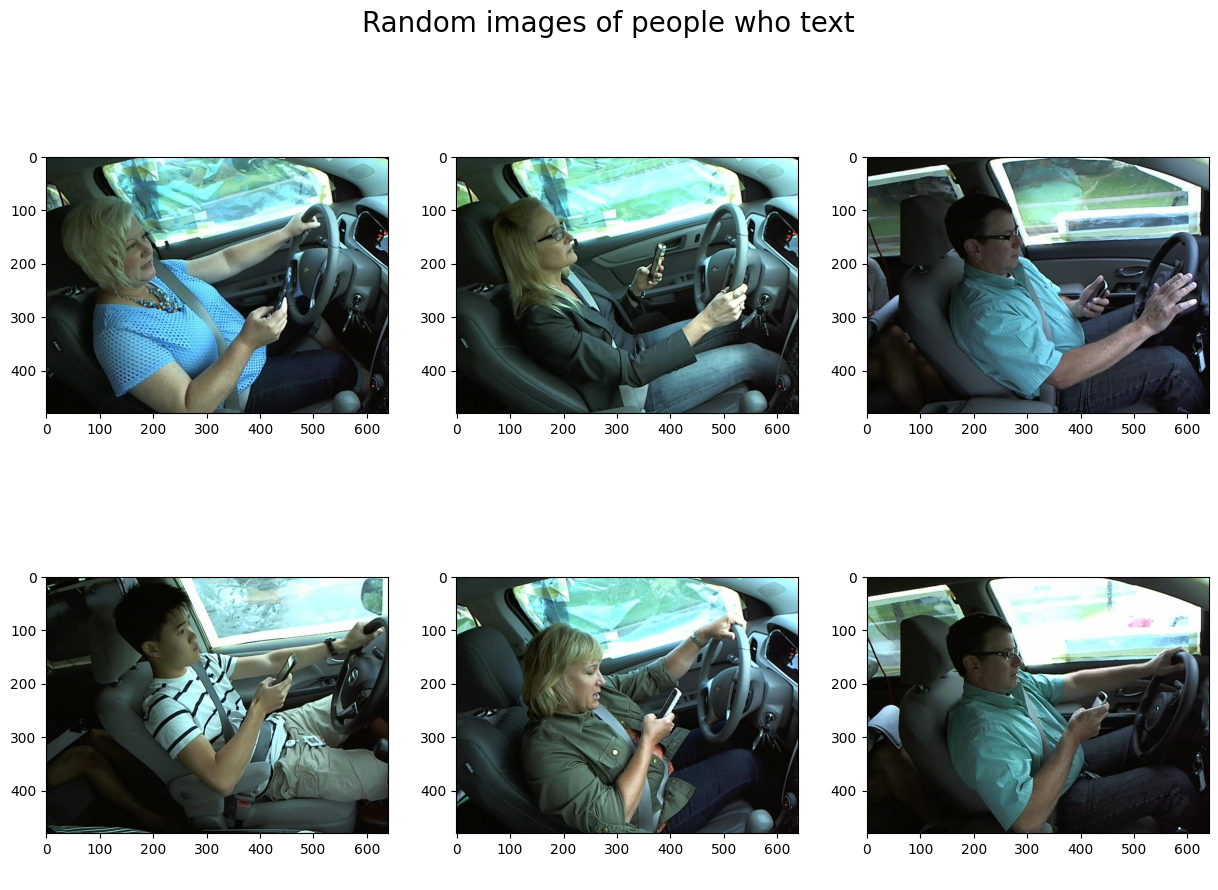

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.axis("off")
n=0
for i in range(6):
    n+=1
    random_image=random.choice(image_list_text)
    imgs=imread(random_image)
    plt.suptitle("Random images of people who text", fontsize=20)
    plt.subplot(2,3,n)
    plt.imshow(imgs)

plt.show()

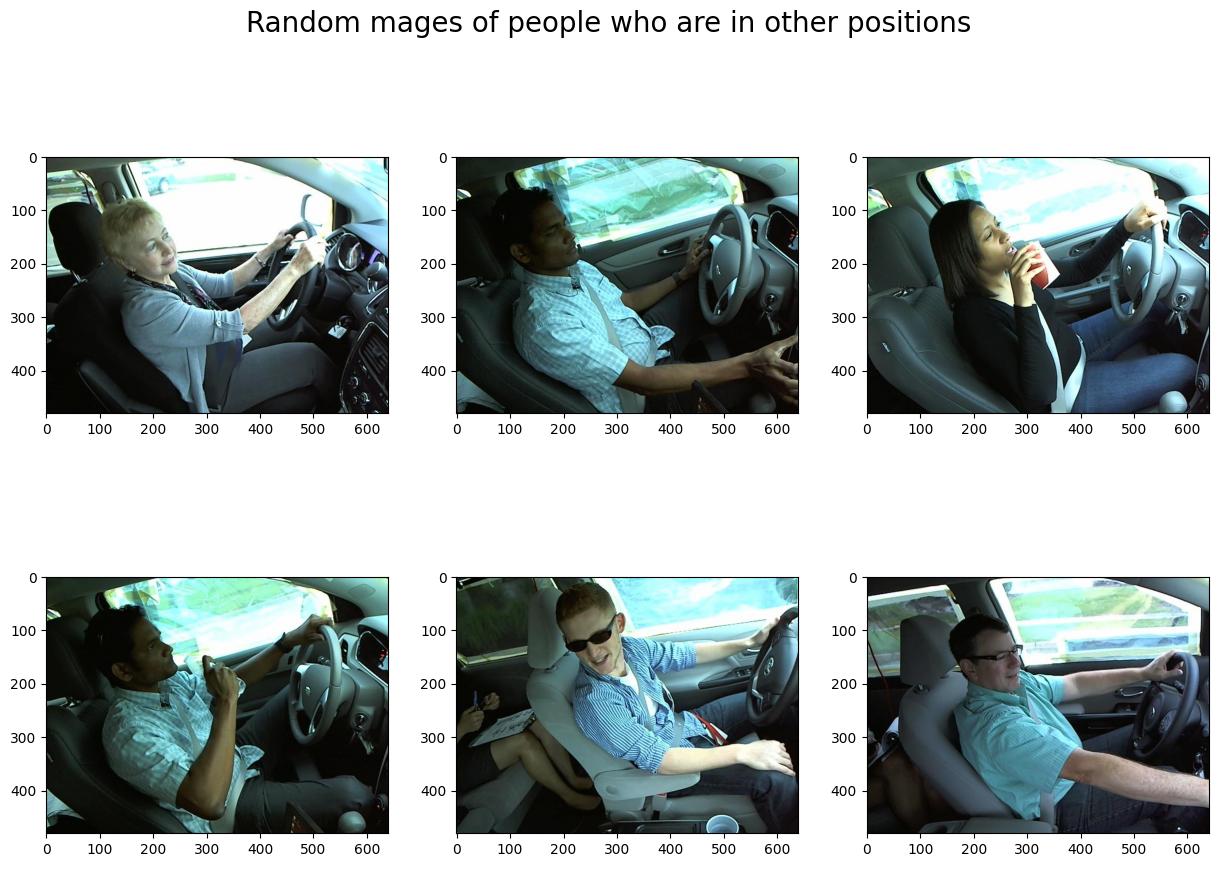

In [ ]:
plt.figure(figsize=(15,10))
plt.axis("off")
n=0
for i in range(6):
    n +=1
    random_imag=random.choice(image_list_other)
    imgs=imread(random_imag)
    plt.suptitle("Random mages of people who are in other positions", fontsize=20)
    plt.subplot(2,3,n)
    plt.imshow(imgs)

plt.show()

# Split data into train, test and prediction

In [ ]:
print (f"75% image_list_other : {.75*(len(image_list_other))} |20% image_list_other: {.2*(len(image_list_other))} |5% image_list_other: {.05*len(image_list_other)}")
print (f"75% image_list_safe : {.75*(len(image_list_safe))} |20% image_list_safe: {.2*(len(image_list_safe))} |5% image_list_safe: {.05*len(image_list_safe)}")
print (f"75% image_list_talking : {.75*(len(image_list_talking))} |20% image_list_talking: {.2*(len(image_list_talking))} |5% image_list_talking: {.05*len(image_list_talking)}")
print (f"75% image_list_text : {.75*(len(image_list_text))} |20% image_list_text: {.2*(len(image_list_text))} |5% image_list_text: {.05*len(image_list_text)}")
print (f"75% image_list_turn : {.75*(len(image_list_turn))} |20% image_list_turn: {.2*(len(image_list_turn))} |5% image_list_turn: {.05*len(image_list_turn)}")

75% image_list_other : 1589.25 |20% image_list_other: 423.8 |5% image_list_other: 105.95
75% image_list_safe : 1652.25 |20% image_list_safe: 440.6 |5% image_list_safe: 110.15
75% image_list_talking : 1626.75 |20% image_list_talking: 433.8 |5% image_list_talking: 108.45
75% image_list_text : 1652.25 |20% image_list_text: 440.6 |5% image_list_text: 110.15
75% image_list_turn : 1542.75 |20% image_list_turn: 411.40000000000003 |5% image_list_turn: 102.85000000000001


In [ ]:
print("train", "test", "valid")
train_other=image_list_other[:1596]
test_other=image_list_other[1596:2021]
valid_other=image_list_other[2021:]

print(len(train_other), len(test_other), len(valid_other))

train_safe=image_list_safe[:1652]
test_safe=image_list_safe[1652:2092]
valid_safe=image_list_safe[2092:]

print(len(train_safe), len(test_safe), len(valid_safe))

train_talking=image_list_talking[:1626]
test_talking=image_list_talking[1626:2059]
valid_talking=image_list_talking[2059:]

print(len(train_talking), len(test_talking), len(valid_talking))

train_text=image_list_text[:1652]
test_text=image_list_text[1652:2092]
valid_text=image_list_text[2092:]

print(len(train_text), len(test_text), len(valid_text))

train_turn=image_list_turn[:1547]
test_turn=image_list_turn[1547:1959]
valid_turn=image_list_turn[1959:]

print(len(train_turn), len(test_turn), len(valid_turn))

train test valid
1596 425 98
1652 440 111
1626 433 110
1652 440 111
1547 412 98


In [ ]:
#other
train_other_df=pd.DataFrame({'image': train_other, 'label':'other'})
test_other_df=pd.DataFrame({'image':test_other, 'label': 'other'})
valid_other_df=pd.DataFrame({'image': valid_other, 'label': 'other'})

In [ ]:
#safe
train_safe_df=pd.DataFrame({'image': train_safe, 'label': 'safe'})
test_safe_df=pd.DataFrame({'image': test_safe, 'label': 'safe'})
valid_safe_df=pd.DataFrame({'image': valid_safe, 'label': 'safe'})

In [ ]:
# talking
train_talking_df=pd.DataFrame({'image': train_talking, 'label': 'talking'})
test_talking_df=pd.DataFrame({'image': test_talking, 'label': 'talking'})
valid_talking_df=pd.DataFrame({'image': valid_talking, 'label': 'talking'})

In [ ]:
# text
train_text_df=pd.DataFrame({'image': train_text, 'label': 'text'})
test_text_df=pd.DataFrame({'image': test_text, 'label': 'text'})
valid_text_df= pd.DataFrame({'image': valid_text, 'label': 'text'})

In [ ]:
#turn
train_turn_df= pd.DataFrame({'image': train_turn, 'label': 'turn'})
test_turn_df=pd.DataFrame({'image': test_turn, 'label': 'turn'})
valid_turn_df=pd.DataFrame({'image': valid_turn, 'label': 'turn'})

In [ ]:
train_df=pd.concat([train_other_df, train_safe_df, train_talking_df, train_text_df, train_turn_df])
test_df=pd.concat([test_other_df, test_safe_df, test_talking_df, test_text_df, test_turn_df])
val_df=pd.concat([valid_other_df, valid_safe_df, valid_talking_df, valid_text_df, valid_turn_df])

print(len(train_df), len(test_df), len(val_df))

8073 2150 528


In [ ]:
trainGenerator=ImageDataGenerator(rescale=1./255)
testGenerator=ImageDataGenerator(rescale=1./255)
valGenerator=ImageDataGenerator(rescale=1./255)

In [ ]:
Batch_size=64
image_size=(240, 240)

trainDataset=trainGenerator.flow_from_dataframe(
    dataframe=train_df,
    closs_mode='categorical',
    x_col='image',
    y_col='label',
    batch_size= Batch_size,
    seed=42,
    shuffle=True,
    target_size=image_size
)


Found 8073 validated image filenames belonging to 5 classes.


In [ ]:
testDataset=testGenerator.flow_from_dataframe(
    dataframe=test_df,
    class_mode='categorical',
    x_col='image',
    y_col='label',
    batch_size=Batch_size,
    seed=42,
    shuffle=True,
    target_size=image_size
)

Found 2150 validated image filenames belonging to 5 classes.


In [ ]:
valDataset=valGenerator.flow_from_dataframe(
    dataframe=val_df,
    class_mode='categorical',
    x_col='image',
    y_col='label',
    batch_size=Batch_size,
    seed=42,
    shuffle=True,
    target_size=image_size

)

Found 528 validated image filenames belonging to 5 classes.


In [ ]:
def AlexNet():
    inputs=layers.Input((240,240,3))
    x=layers.Conv2D(96,11,4, activation='relu')(inputs)
    x=layers.BatchNormalization()(x)
    x=layers.MaxPooling2D(3,2)(x)
    x=layers.Conv2D(256, 5, 1, activation='relu')(x)
    x=layers.BatchNormalization()(x)
    x=layers.MaxPooling2D(3,2)(x)
    x=layers.Conv2D(384, 3, 1, activation='relu')(x)
    x=layers.Conv2D(384, 3, 1, activation='relu')(x)
    x=layers.Conv2D(256, 3, 1, activation='relu')(x)
    x=layers.MaxPooling2D(3,2)(x)
    x=layers.Flatten()(x)
    x=layers.Dense(4096, activation='relu')(x)
    x=layers.Dropout(0.5)(x)
    x=layers.Dense(4096, activation='relu')(x)
    x=layers.Dropout(0.5)(x)
    x=layers.Dense(5, activation='softmax')(x)

    model_Alex=models.Model(inputs=inputs,
                           outputs=x)
    return model_Alex

model_Alex=AlexNet()
model_Alex.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 58, 58, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 58, 58, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 28, 28, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 9, 9, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 5, 5, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4096)                │       4,198,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │          20,485 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,748,805 (94.41 MB)

 Trainable params: 24,748,101 (94.41 MB)

 Non-trainable params: 704 (2.75 KB)

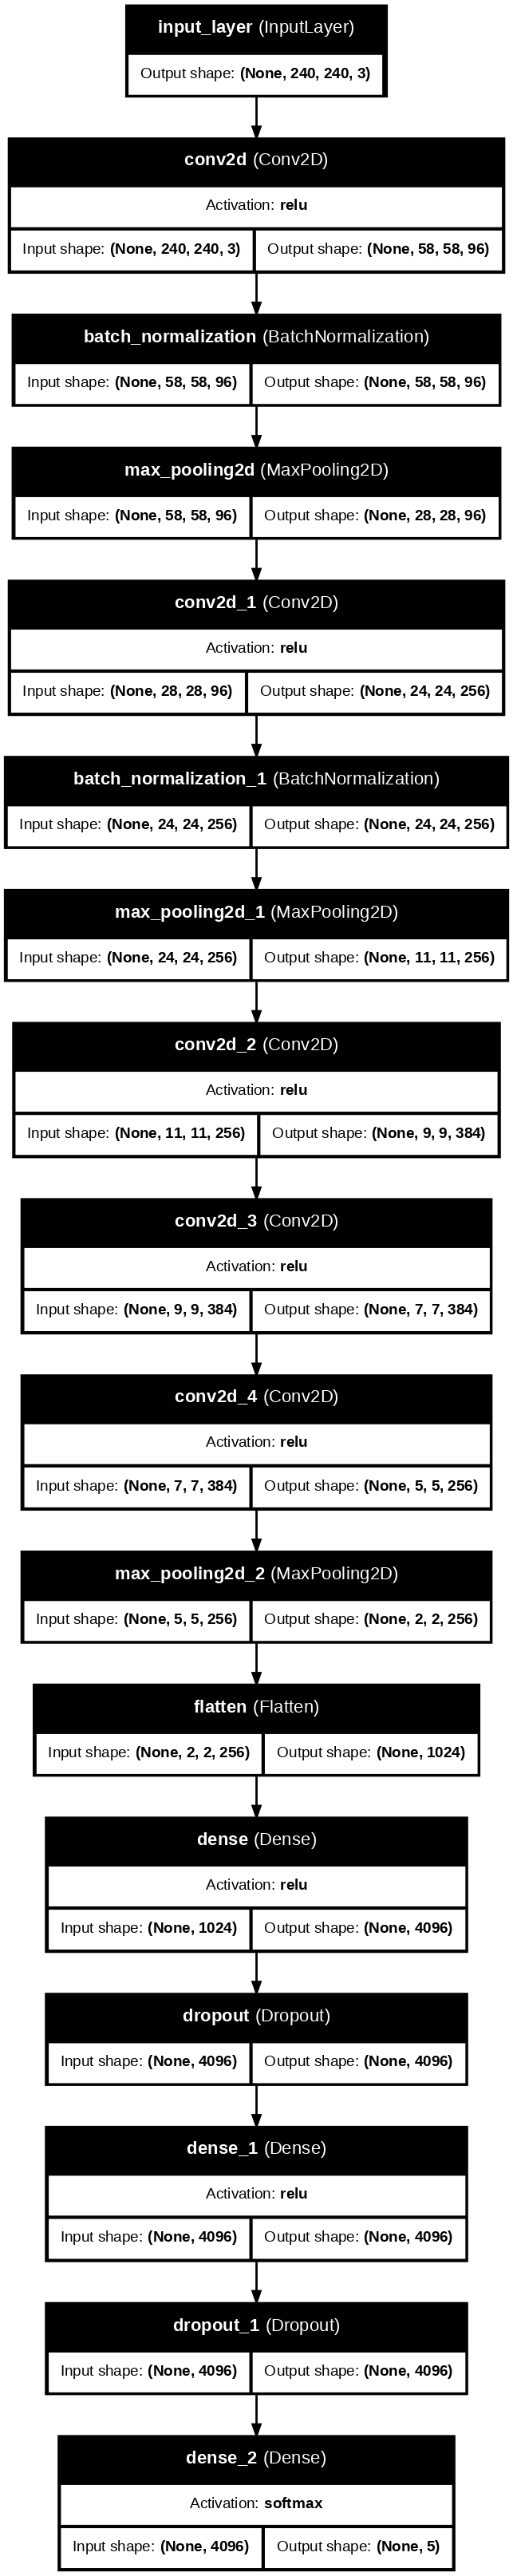

In [ ]:
tf.keras.utils.plot_model(
    model_Alex,
    to_file='alex_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [ ]:
model_Alex.compile(loss=BinaryCrossentropy(),
                  optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
Alex_model = model_Alex.fit(trainDataset, epochs=5, validation_data=valDataset)

Epoch 1/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 64s 391ms/step - accuracy: 0.2960 - loss: 0.7394 - val_accuracy: 0.3220 - val_loss: 0.5112
Epoch 2/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 46s 339ms/step - accuracy: 0.6678 - loss: 0.2898 - val_accuracy: 0.6439 - val_loss: 0.3191
Epoch 3/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 74s 292ms/step - accuracy: 0.8230 - loss: 0.1847 - val_accuracy: 0.8769 - val_loss: 0.1201
Epoch 4/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 44s 336ms/step - accuracy: 0.8971 - loss: 0.1080 - val_accuracy: 0.9091 - val_loss: 0.1013
Epoch 5/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 84s 350ms/step - accuracy: 0.9297 - loss: 0.0745 - val_accuracy: 0.8731 - val_loss: 0.1388


In [ ]:
training_loss_alex=Alex_model.history['loss']
val_loss_alex=Alex_model.history['val_loss']
training_acc_alex=Alex_model.history['accuracy']
val_acc_alex=Alex_model.history['val_accuracy']

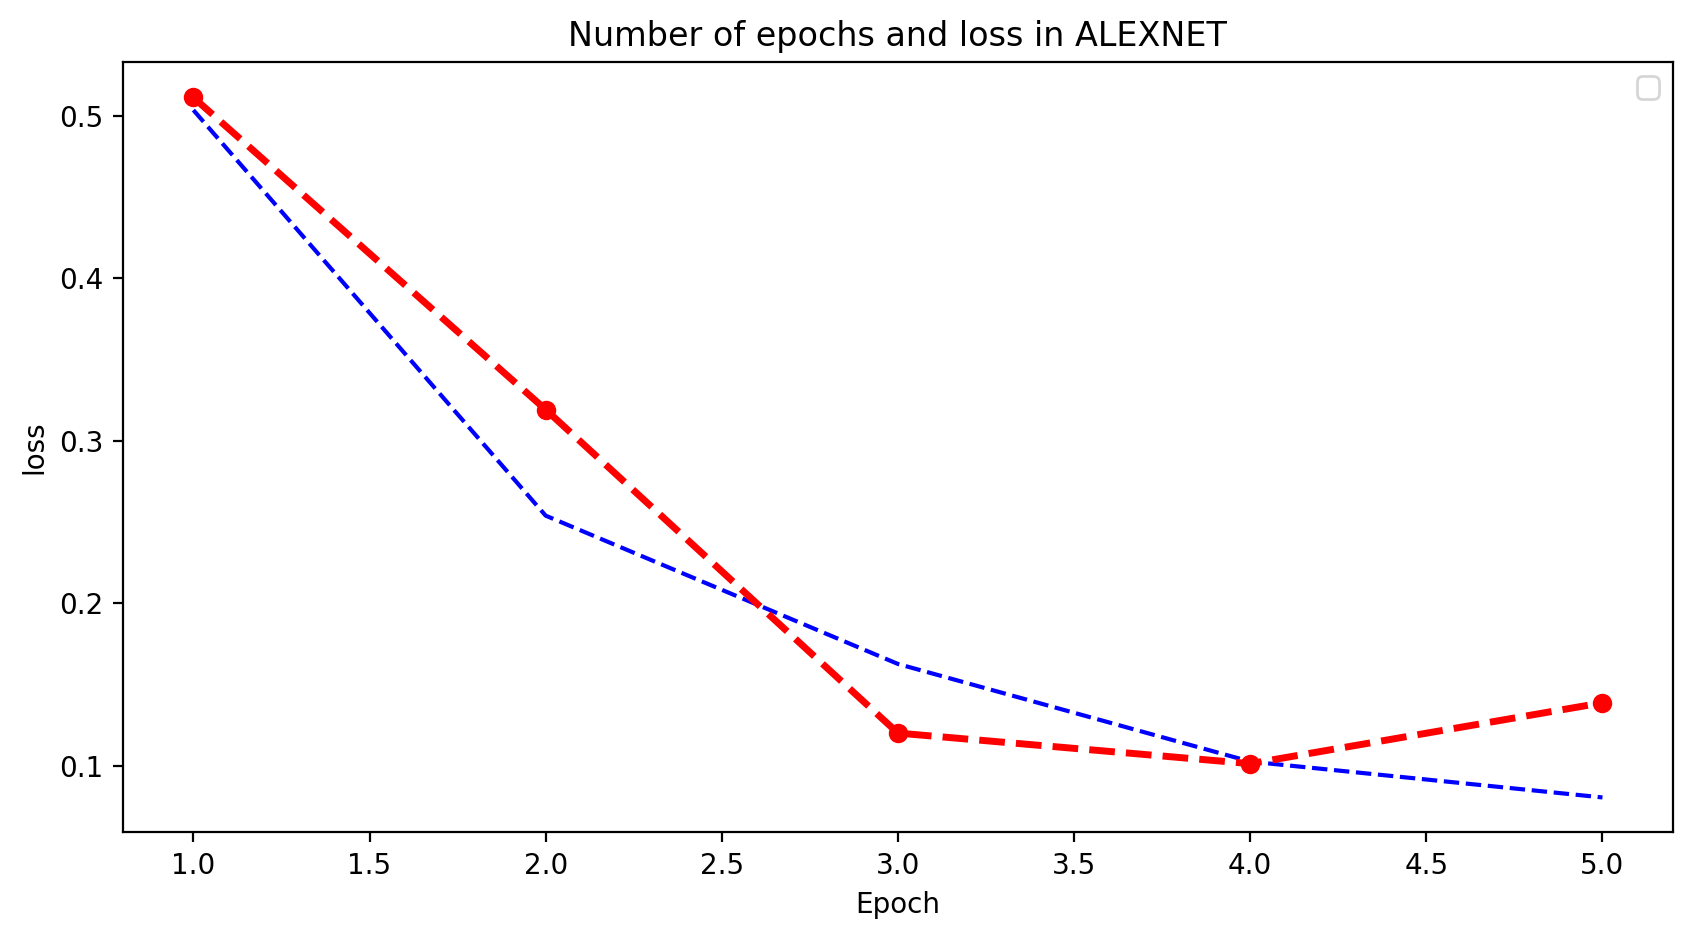

In [ ]:
epoch_count=range(1, len(training_loss_alex)+1)
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_loss_alex, 'r--', color='blue')
plt.plot(epoch_count, val_loss_alex, '--bo', color='red', linewidth = '2.5', label='line with marker')
plt.legend('Training Loss', 'Val Loss')
plt.title('Number of epochs and loss in ALEXNET')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show();

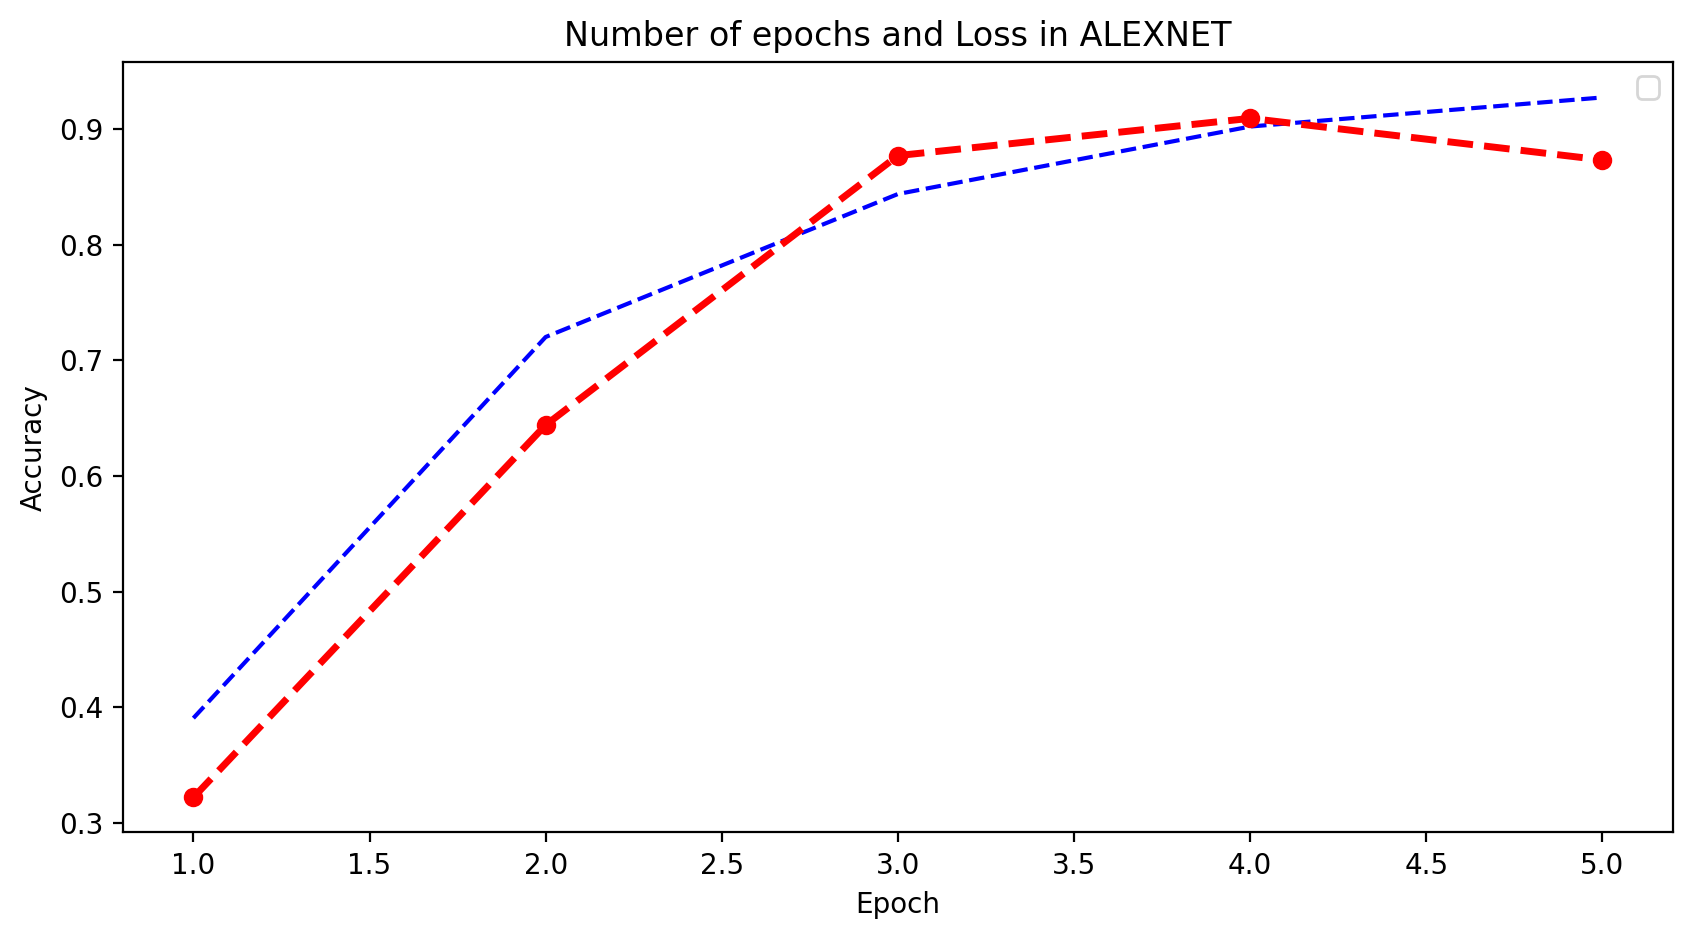

In [ ]:
plt.figure(figsize=(10,5),dpi=200)
plt.plot(epoch_count, training_acc_alex, 'r--', color='blue')
plt.plot(epoch_count, val_acc_alex, '--bo', color='red', linewidth = '2.5', label='line with marker')
plt.legend('Training Loss', 'Val Loss')
plt.title('Number of epochs and Loss in ALEXNET')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot()
plt.show();

In [ ]:
def VGGNet():
  inputs=layers.Input((240, 240, 3))
  x=layers.Conv2D(64,3,1, activation='relu')(inputs)
  x=layers.Conv2D(64,3,1, activation='relu')(x)
  x=layers.BatchNormalization()(x)
  x=layers.MaxPooling2D(2,2)(x)
  x=layers.Conv2D(128,3,1, activation='relu')(x)
  x=layers.Conv2D(128,3,1, activation='relu')(x)
  x=layers.BatchNormalization()(x)
  x=layers.MaxPooling2D(2,2)(x)
  x=layers.Conv2D(256,3,1, activation='relu')(x)
  x=layers.Conv2D(256,3,1, activation='relu')(x)
  x=layers.Conv2D(256,3,1, activation='relu')(x)
  x=layers.BatchNormalization()(x)
  x=layers.MaxPooling2D(2,2)(x)
  x=layers.Conv2D(512,3,1, activation='relu')(x)
  x=layers.Conv2D(512,3,1, activation='relu')(x)
  x=layers.Conv2D(512,3,1, activation='relu')(x)
  x=layers.MaxPooling2D(2,2)(x)
  x=layers.Flatten()(x)
  x=layers.Dense(4096, activation='relu')(x)
  x=layers.Dropout(0.5)(x)
  x=layers.Dense(4096, activation='relu')(x)
  x=layers.Dropout(0.5)(x)
  x=layers.Dense(5, activation='softmax')(x)

  model_VGG=models.Model(inputs=inputs,
                         outputs=x)
  return model_VGG

model_VGG=VGGNet()
model_VGG.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 238, 238, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 236, 236, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 236, 236, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 118, 118, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 116, 116, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 114, 114, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 114, 114, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 57, 57, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 55, 55, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 53, 53, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 51, 51, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 51, 51, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 25, 25, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 23, 23, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 21, 21, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 19, 19, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4096)                │     169,873,4

 Total params: 194,312,261 (741.24 MB)

 Trainable params: 194,311,365 (741.24 MB)

 Non-trainable params: 896 (3.50 KB)

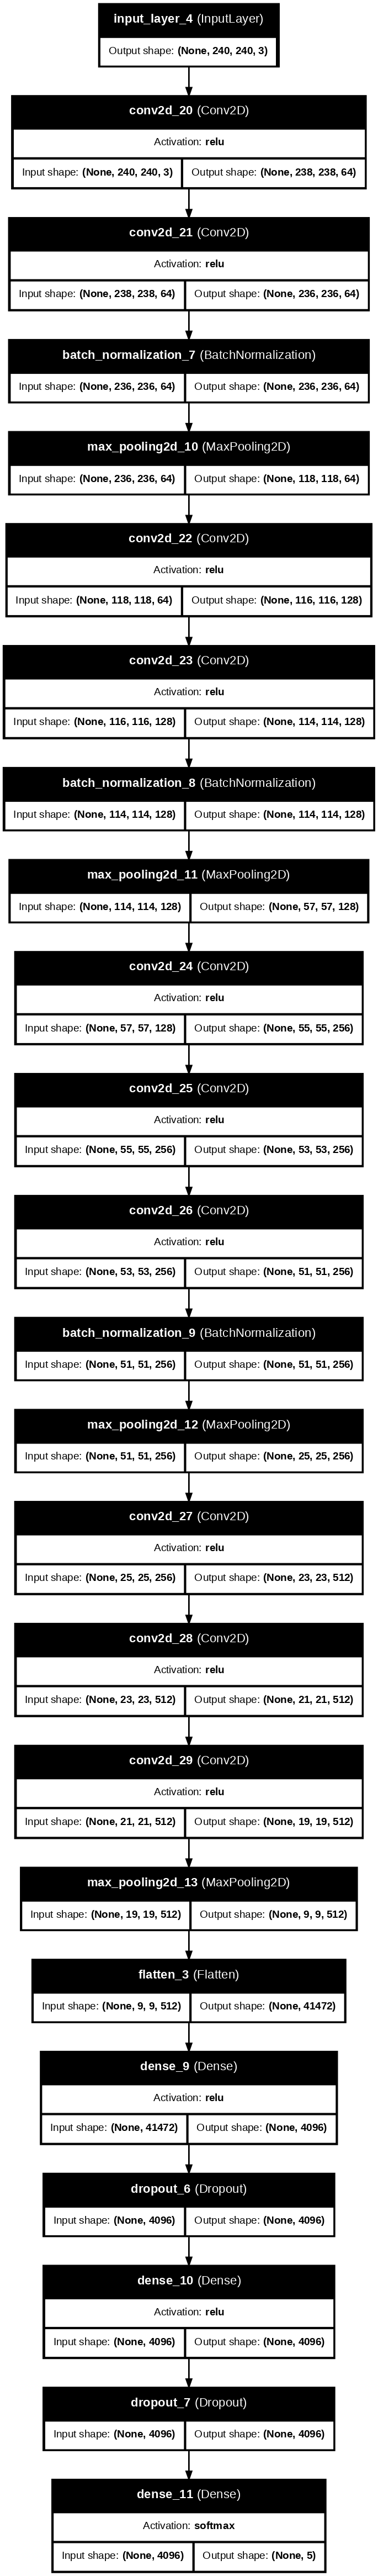

In [ ]:
tf.keras.utils.plot_model(
    model_VGG,
    to_file='vgg_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [ ]:
model_VGG.compile(loss=BinaryCrossentropy(),
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])


In [ ]:
VGG_model=model_VGG.fit(trainDataset, epochs=5, validation_data=valDataset)

Epoch 1/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.3551 - loss: 5.1862 - val_accuracy: 0.2500 - val_loss: 0.9576
Epoch 2/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 126s 958ms/step - accuracy: 0.8533 - loss: 0.1605 - val_accuracy: 0.3693 - val_loss: 0.5687
Epoch 3/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 142s 957ms/step - accuracy: 0.9257 - loss: 0.0860 - val_accuracy: 0.6667 - val_loss: 0.4072
Epoch 4/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 122s 947ms/step - accuracy: 0.9594 - loss: 0.0495 - val_accuracy: 0.8731 - val_loss: 0.1189
Epoch 5/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 145s 974ms/step - accuracy: 0.9721 - loss: 0.0326 - val_accuracy: 0.9394 - val_loss: 0.0758


In [ ]:
training_loss_vgg=VGG_model.history['loss']
val_loss_vgg=VGG_model.history['val_loss']
training_acc_vgg=VGG_model.history['accuracy']
val_acc_vgg=VGG_model.history['val_accuracy']

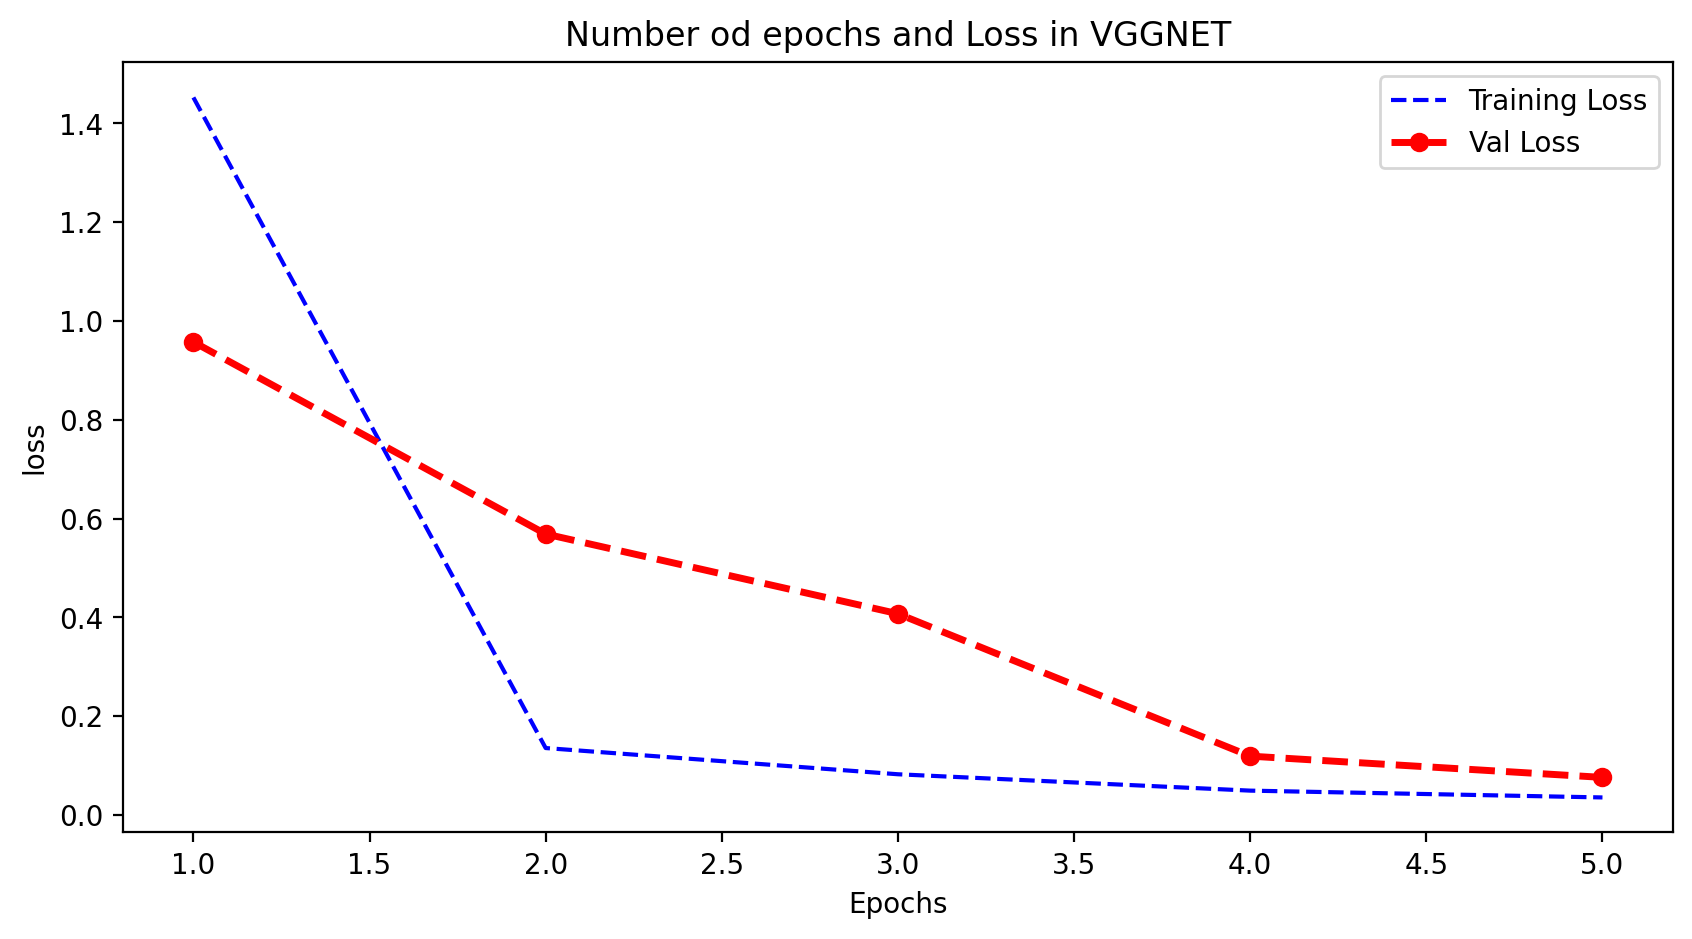

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_loss_vgg, 'r--', color='blue')
plt.plot(epoch_count, val_loss_vgg, '--bo', color='red', linewidth='2.5', label='line with marker')
plt.legend(['Training Loss', 'Val Loss'])
plt.title('Number od epochs and Loss in VGGNET')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show();


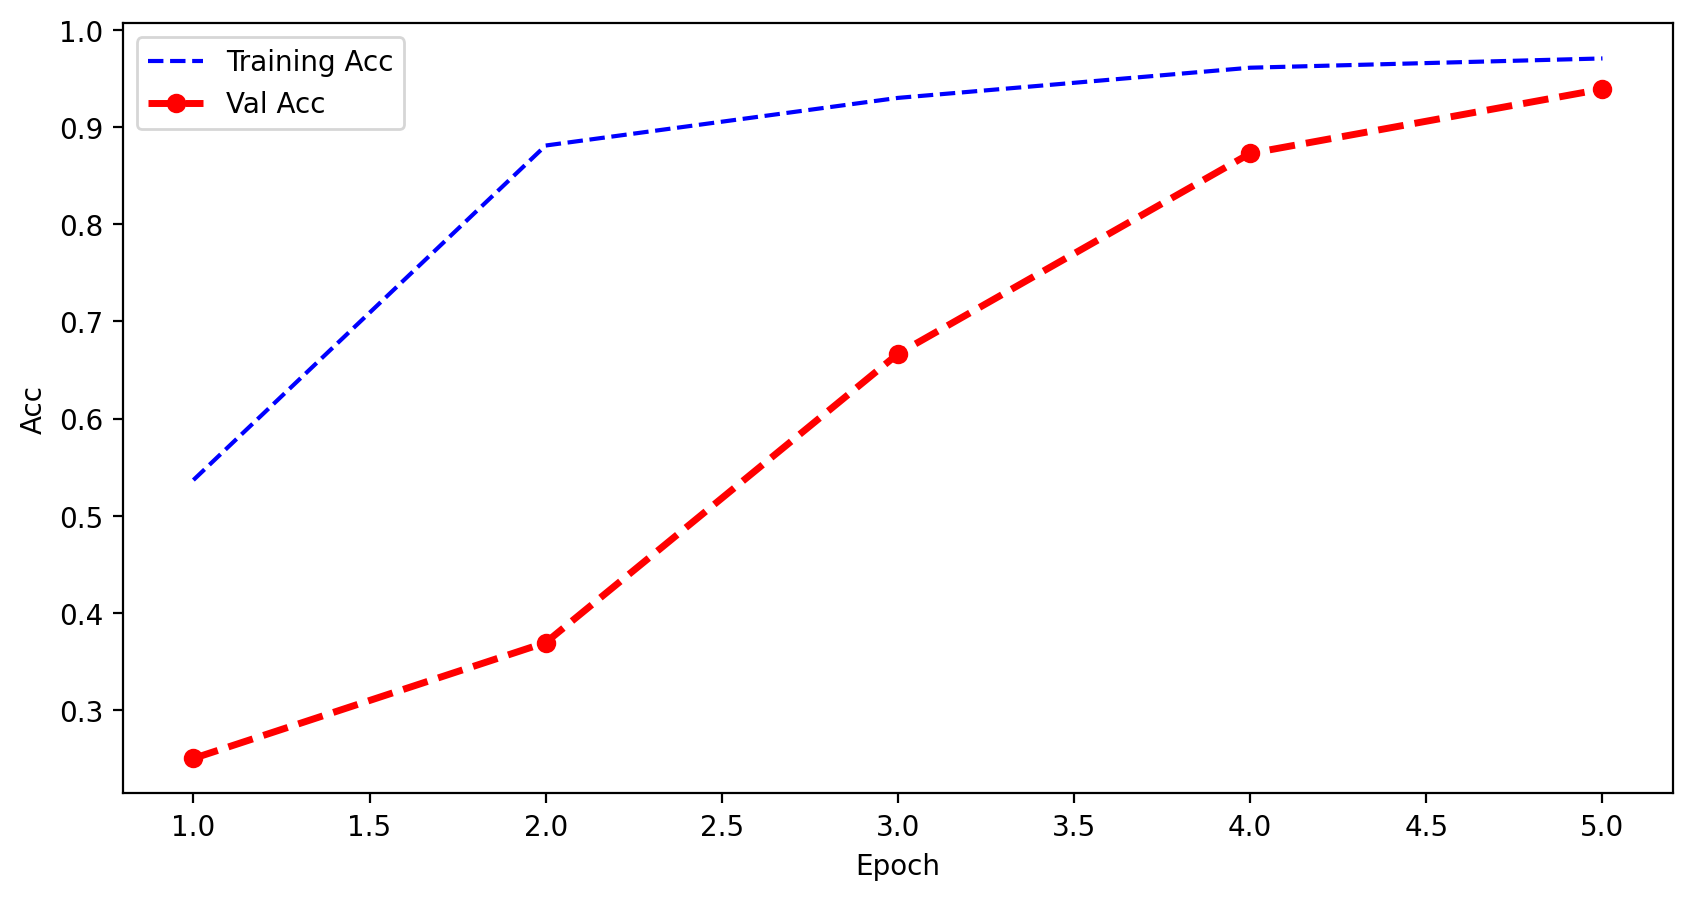

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_acc_vgg, 'r--', color='blue')
plt.plot(epoch_count, val_acc_vgg, '--bo', color='red', linewidth='2.5', label='line with marker')
plt.legend(['Training Acc', 'Val Acc'])
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.show()

In [ ]:
def ResNet34():
  inputs=layers.Input((240,240,3))
  x=layers.Conv2D(64,7,2, padding='valid', activation='relu')(inputs)
  x=layers.MaxPooling2D(strides=2, padding='same')(x)
  x=layers.Conv2D(64,3,1, padding='same', activation='relu')(x)
  x=layers.BatchNormalization()(x)
  x=layers.Conv2D(64,3,1, padding='same', activation='relu')(x)
  x=layers.BatchNormalization()(x)
  x=layers.Conv2D(64,3,1, padding='same', activation='relu')(x)
  x=layers.BatchNormalization()(x)
  x=layers.Conv2D(64,3,1, padding='same', activation='relu')(x)
  x=layers.BatchNormalization()(x)

  x=layers.Conv2D(128,3,2, padding='same', activation='relu')(x)
  x=layers.BatchNormalization()(x)
  x=layers.Conv2D(128,3,1, padding='same', activation='relu')(x)
  x=layers.BatchNormalization()(x)
  x=layers.Conv2D(128,3,1, padding='same', activation='relu')(x)
  x=layers.BatchNormalization()(x)
  x=layers.Conv2D(128,3,1, padding='same', activation='relu')(x)
  x=layers.BatchNormalization()(x)

  x=layers.Conv2D(256,3,2, padding='same', activation='relu')(x)
  x=layers.BatchNormalization()(x)
  x=layers.Conv2D(256,3,1, padding='same', activation='relu')(x)
  x=layers.BatchNormalization()(x)
  x=layers.Conv2D(256, 3,1, padding='same', activation='relu')(x)
  x=layers.BatchNormalization()(x)
  x=layers.Conv2D(256,3,1, padding='same', activation='relu')(x)
  x=layers.BatchNormalization()(x)
  x=layers.Conv2D(256,3,1, padding='same', activation='relu')(x)
  x=layers.BatchNormalization()(x)
  x=layers.Conv2D(256,3,1, padding='same', activation='relu')(x)
  x=layers.BatchNormalization()(x)

  x=layers.Conv2D(512,3,2, padding='same', activation='relu')(x)
  x=layers.BatchNormalization()(x)
  x=layers.Conv2D(512,3,1, padding='same', activation='relu')(x)
  x=layers.BatchNormalization()(x)
  x=layers.Conv2D(512, 3,1, padding='same', activation='relu')(x)
  x=layers.BatchNormalization()(x)
  x=layers.Flatten()(x)
  x=layers.Dense(4096, activation='relu')(x)
  x=layers.Dropout(0.5)(x)
  x=layers.Dense(4096, activation='relu')(x)
  x=layers.Dropout(0.5)(x)
  x=layers.Dense(5, activation='softmax')(x)

  model_Res=models.Model(inputs=inputs,
                         outputs=x)

  return model_Res

model_Res=ResNet34()
model_Res.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 117, 117, 64)        │           9,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 59, 59, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 59, 59, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 59, 59, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_60 (Conv2D)                   │ (None, 59, 59, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 59, 59, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 59, 59, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 59, 59, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 59, 59, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 59, 59, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 30, 30, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_64 (Conv2D)                   │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 30, 30, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_65 (Conv2D)                   │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_38               │ (None, 30, 30, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_66 (Conv2D)                   │ (None, 30, 30, 128)         │         147,5

 Total params: 160,858,117 (613.63 MB)

 Trainable params: 160,850,437 (613.60 MB)

 Non-trainable params: 7,680 (30.00 KB)

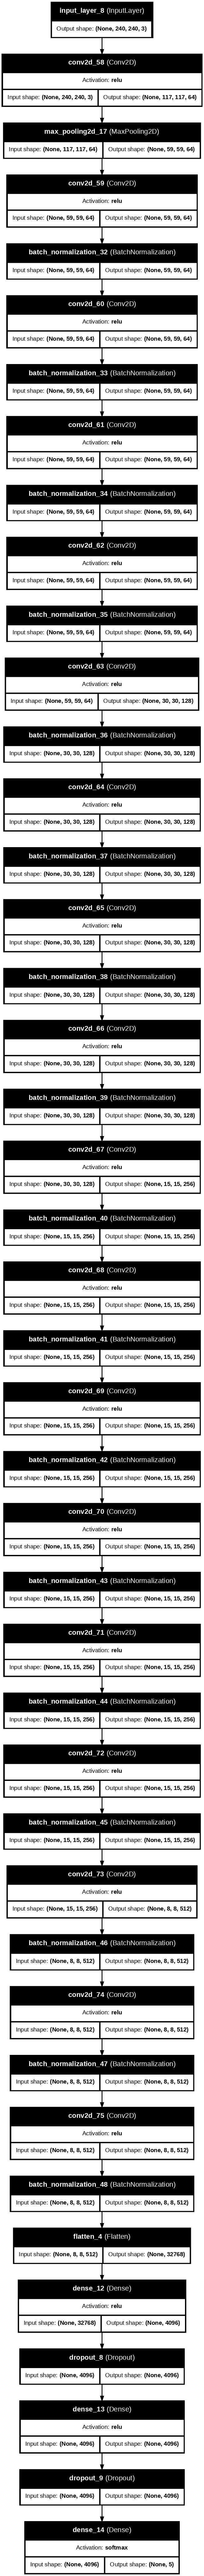

In [ ]:
tf.keras.utils.plot_model(
    model_Res,
    to_file='res_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100

)

In [ ]:
model_Res.compile(loss=BinaryCrossentropy(),
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

In [ ]:
RES_model=model_Res.fit(trainDataset,
                        epochs=5,
                        validation_data=valDataset)

Epoch 1/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 112s 588ms/step - accuracy: 0.3687 - loss: 0.7798 - val_accuracy: 0.1875 - val_loss: 2.5807
Epoch 2/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 99s 420ms/step - accuracy: 0.5158 - loss: 0.4107 - val_accuracy: 0.1856 - val_loss: 5.5916
Epoch 3/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 82s 420ms/step - accuracy: 0.5802 - loss: 0.3346 - val_accuracy: 0.4280 - val_loss: 0.5650
Epoch 4/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 83s 428ms/step - accuracy: 0.5858 - loss: 0.3284 - val_accuracy: 0.3371 - val_loss: 12.7919
Epoch 5/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 50s 374ms/step - accuracy: 0.6000 - loss: 0.3330 - val_accuracy: 0.5928 - val_loss: 0.4325


In [ ]:
training_loss_res=RES_model.history['loss']
val_loss_res=RES_model.history['val_loss']
training_acc_res=RES_model.history['accuracy']
val_acc_res=RES_model.history['val_accuracy']

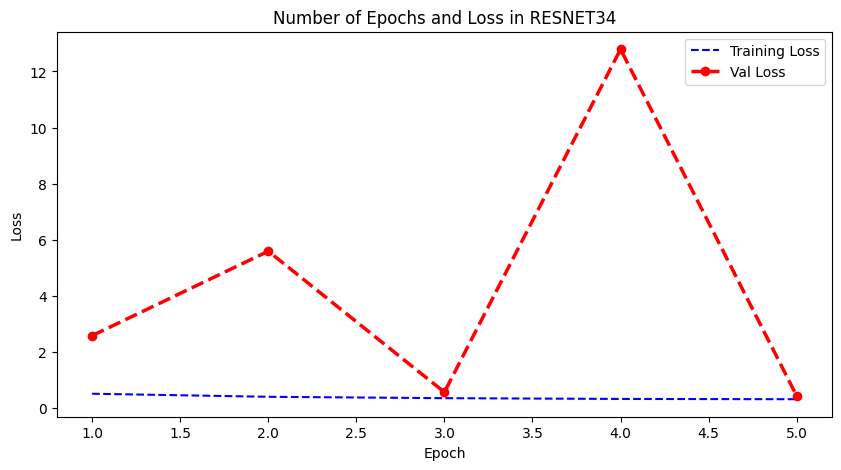

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(epoch_count, training_loss_res,'r--', color='blue')
plt.plot(epoch_count, val_loss_res, '--bo', color='red', linewidth='2.5', label='line with marker')
plt.legend(['Training Loss', 'Val Loss'])
plt.title('Number of Epochs and Loss in RESNET34')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

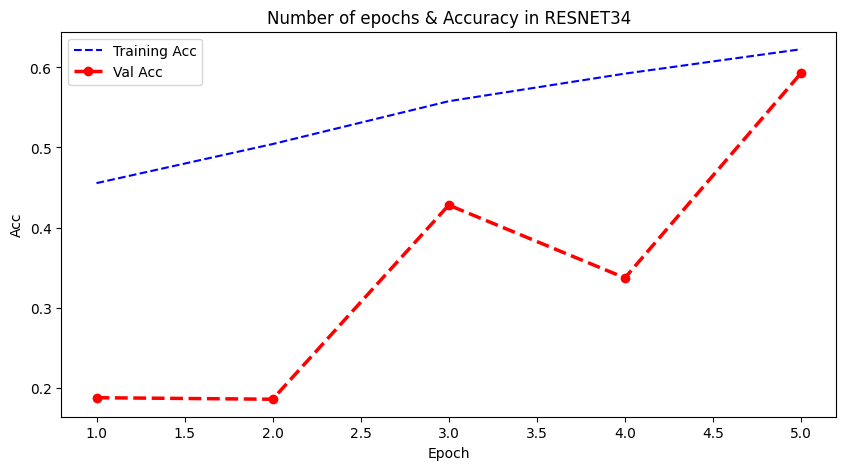

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(epoch_count, training_acc_res, 'r--', color='blue')
plt.plot(epoch_count, val_acc_res, '--bo', color='red', linewidth='2.5', label='line with marker')
plt.legend(['Training Acc', 'Val Acc'])
plt.title('Number of epochs & Accuracy in RESNET34')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.show()


# Comparision of (Acc)s and (Loss)s

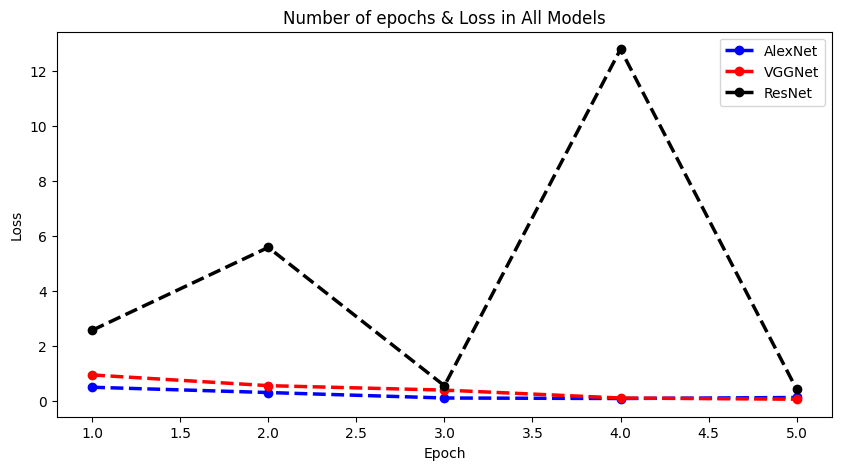

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(epoch_count, val_loss_alex, '--bo', color='blue', linewidth='2.5', label='line with marker')
plt.plot(epoch_count, val_loss_vgg, '--bo', color= 'red',linewidth='2.5', label='line with marker')
plt.plot(epoch_count, val_loss_res, '--bo', color='black', linewidth='2.5', label='line with marker')
plt.legend(['AlexNet', 'VGGNet','ResNet'])
plt.title('Number of epochs & Loss in All Models')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();


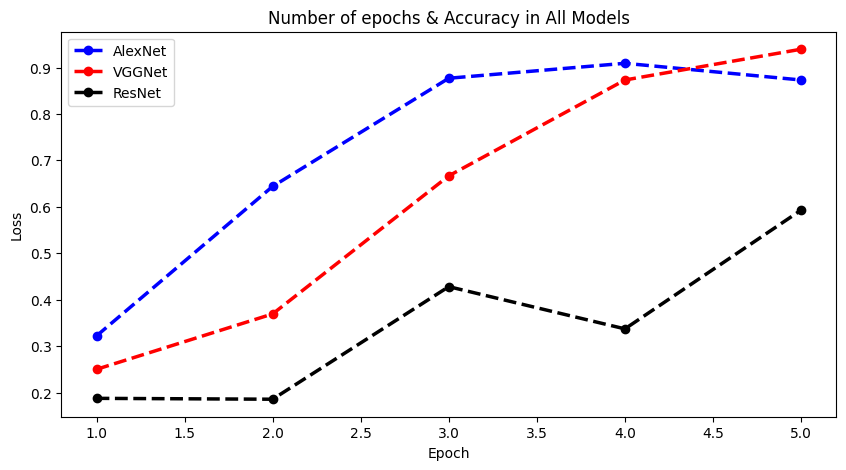

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(epoch_count, val_acc_alex, '--bo',color= 'blue',
         linewidth = '2.5', label='line with marker')
plt.plot(epoch_count, val_acc_vgg, '--bo',color= 'red',
         linewidth = '2.5', label='line with marker')
plt.plot(epoch_count, val_acc_res, '--bo',color= 'black',
         linewidth = '2.5', label='line with marker')
plt.legend(['AlexNet', 'VGGNet','ResNet'])
plt.title('Number of epochs & Accuracy in All Models')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();
